In [1]:
import numpy as np
import matplotlib.pyplot as plt
import BOPackage

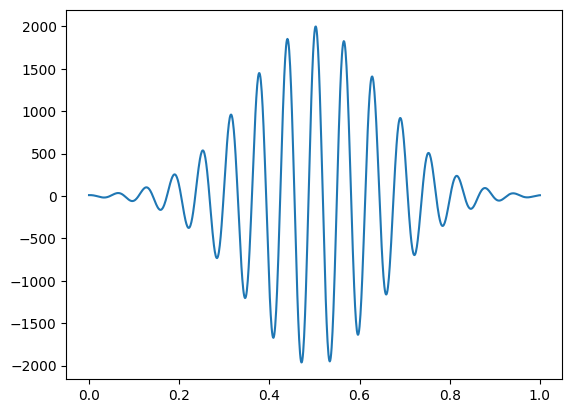

In [2]:
def ObjectiveFunction(x):
    x_centre = 0.5
    FWHM = 0.3
    width = FWHM / (2 * np.log(2))

    spatial_intensity =  np.exp(- ((x - x_centre) / width)**2)

    return 2000 * np.cos(100 * x) * spatial_intensity

x = np.linspace(0, 1, 1001, endpoint=True)

plt.plot(x, ObjectiveFunction(x))

In [3]:
"""
Configure the optimiser.
"""

log_path = '/Users/jordanlee/Projects/SummerProject/Bayesian/logger.txt'

def RBF_Kernel(X1, X2, length_scale=0.1):
    """
    Radial Basis Function (RBF) kernel.

    Args:
        X1 (np.ndarray): First set of points.
        X2 (np.ndarray): Second set of points.
        length_scale (float): The length scale parameter.
        variance (float): The variance parameter.

    Returns:
        np.ndarray: The kernel matrix.
    """
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return np.exp(-0.5 / length_scale**2 * sqdist)


def AcquisitionFunction(mean, standard_deviation, kappa): 
    """
    Compute the acquisition value for a given set of parameters.

    This function calculates the acquisition value using the Upper Confidence Bound (UCB) method.
    The acquisition value is determined by combining the predicted mean, the standard deviation, 
    and a kappa value that balances exploration and exploitation.

    Parameters:
    - mean (float): The predicted mean value of the objective function.
    - standard_deviation (float): The standard deviation (uncertainty) of the prediction.
    - kappa (float): A parameter that controls the trade-off between exploration and exploitation.

    Returns:
    - float: The acquisition value, which is used to guide the selection of the next sample point.
    """
    return mean + kappa * standard_deviation

bounds = np.array([[0, 1]])

n_samples = 10
length_scale = 0.04
max_kappa = 4
min_kappa = 0.1
output_directory = '/Users/jordanlee/Projects/SummerProject/Bayesian/BayesianOptimiser2.0/Outputs'

""" Needs to be optional! """
iterations_between_reducing_bounds = 1000
first_reduce_bounds = 100000
reduce_bounds_factor = 10000

In [4]:
bo = BOPackage.BO(KernelFunction=BOPackage.RBF_Kernel, 
                  length_scale=0.04, 
                  AcquisitionFunction=BOPackage.UCB, 
                  max_kappa=max_kappa, 
                  min_kappa=min_kappa,
                  bounds=bounds, 
                  n_samples=n_samples,
                  random_seed=12)

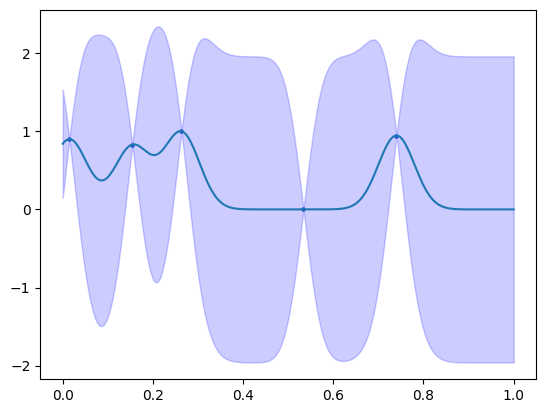

In [5]:
raw_X = bo.GetRandomXBatch(batch_size=5)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(np.transpose([np.linspace(0, 1, 1500, endpoint=True)]))
plt.plot(np.linspace(0, 1, 1500, endpoint=True), mean)
shifted_y_data = bo.y_data - np.min(bo.y_data)
plt.scatter(bo.X_data, shifted_y_data / np.max(shifted_y_data), s=5)

plt.fill_between(np.linspace(0, 1, 1500, endpoint=True), 
                    mean - 1.96 * np.sqrt(variance), 
                    mean + 1.96 * np.sqrt(variance), 
                    color='blue', alpha=0.2, label='95% Confidence Interval'
                    )

(0.0, 1.0)

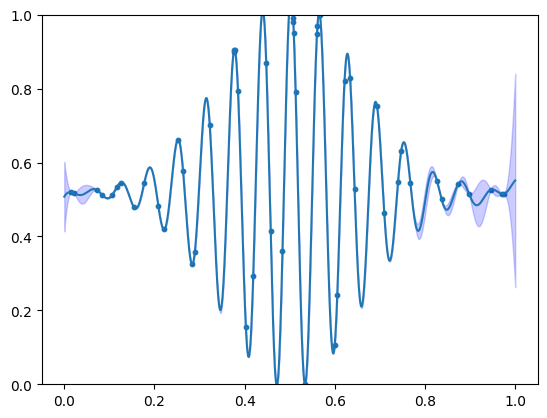

In [14]:
raw_X = bo.GetNextXBatch(batch_size=5)
raw_Y = ObjectiveFunction(raw_X)
bo.UpdateData(raw_X, raw_Y)

mean, variance = bo.PredictMeanVariance(np.transpose([np.linspace(0, 1, 1500, endpoint=True)]))
plt.plot(np.linspace(0, 1, 1500, endpoint=True), mean)
shifted_y_data = bo.y_data - np.min(bo.y_data)
plt.scatter(bo.X_data, shifted_y_data / np.max(shifted_y_data), s=10)

plt.fill_between(np.linspace(0, 1, 1500, endpoint=True), 
                    mean - 1.96 * np.sqrt(variance), 
                    mean + 1.96 * np.sqrt(variance), 
                    color='blue', alpha=0.2, label='95% Confidence Interval'
                    )

plt.ylim(0, 1)